# Plot

In [2]:
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import glob,os
import pylhe, gzip, tempfile
from getInfoFromBanner import getInfo

pd.option_context('display.max_columns', -1)

pd.options.mode.chained_assignment = None #Disable copy warnings
# plt.style.use('fivethirtyeight') #Set style
# mpl.rcParams.update({'figure.figsize' : (15,10)})  #Set general plotting options
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

plt.rcParams.update({"savefig.dpi" : 300}) #Figure resolution


#Define plotting style:
sns.set() #Set style
sns.set_style('ticks',{'font.family':'Times New Roman', 'font.serif':'Times New Roman'})
sns.set_context('paper', font_scale=1.8)
cm = plt.cm.get_cmap('RdYlBu')

In [3]:
files = list(glob.glob('../processFolders/*xsecs/Events/*/unweighted_events.lhe.gz'))
# files = [f for f in files[:] if not (('gg2TT_formFactors' in f) and ('run_04' not in f))]
# print(files)

In [22]:
# Get info
fileData = {f : getInfo(f) for f in files}
for fInfo in fileData.values():
    fInfo['mST'] = fInfo['(mST,mChi,mT,yDM)'][0]
    fInfo['mChi'] = fInfo['(mST,mChi,mT,yDM)'][1]
    fInfo['mT'] = fInfo['(mST,mChi,mT,yDM)'][2]
    fInfo['yDM'] = fInfo['(mST,mChi,mT,yDM)'][3]

allModels = sorted(list(set([info['model'] for info in fileData.values()])))
allPars = sorted(list(set([info['(mST,mChi,mT,yDM)'] for info in fileData.values()])))
allProcesses = sorted(list(set([info['process'] for info in fileData.values()])))
# print(allModels)
# print(allPars)
print(allProcesses)

['$g g \\to \\bar{t} t$', '$q q \\to \\bar{t} t$']


In [13]:
# Select files:
models = allModels[:]
pars = allPars[:]
procs = allProcesses[:]

selectedFiles = []
for f,fInfo in fileData.items():
    if fInfo['model'] not in models:
        continue
    if fInfo['process'] not in procs:
        continue
        
    if fInfo['(mST,mChi,mT,yDM)'] not in pars:
        continue
    selectedFiles.append(f)
    
filesDict = [fInfo for f,fInfo in fileData.items() if f in selectedFiles]
    

### Create data frame with cross-sections

In [23]:
allData = pd.DataFrame.from_dict(filesDict)
allData.drop(columns='(mST,mChi,mT,yDM)',inplace=True)
allData.replace(to_replace='$g g \\to \\bar{t} t$', value='gg2tt',inplace=True)
allData.replace(to_replace='$q q \\to \\bar{t} t$', value='qq2tt',inplace=True)

In [24]:
allData

,model,process,xsec (pb),nevents,mST,mChi,mT,yDM
0,EFT,gg2tt,-0.134400,5000,500.0,150.0,172.5,1.0
1,EFT,gg2tt,-0.037210,5000,900.0,400.0,172.5,1.0
2,EFT,gg2tt,-0.085573,5000,600.0,250.0,172.5,1.0
3,EFT,gg2tt,-0.062287,5000,700.0,300.0,172.5,1.0
4,EFT,gg2tt,-0.031403,5000,800.0,750.0,172.5,1.0
...,...,...,...,...,...,...,...,...
255,1-loop,gg2tt,-0.037484,5000,900.0,350.0,172.5,1.0
256,1-loop,gg2tt,-0.053786,5000,800.0,150.0,172.5,1.0
257,1-loop,gg2tt,-0.043048,5000,800.0,400.0,172.5,1.0
258,1-loop,gg2tt,-0.068208,5000,700.0,150.0,172.5,1.0


In [41]:
allDataEFT = allData[allData['model'] == 'EFT']
allDataLoop = allData[allData['model'] == '1-loop']
allDataEFT.sort_values(by=['process','mST','mChi'],inplace=True,ignore_index=True)
allDataLoop.sort_values(by=['process','mST','mChi'],inplace=True,ignore_index=True)

In [42]:
allDataEFT

,model,process,xsec (pb),nevents,mST,mChi,mT,yDM
0,EFT,gg2tt,-0.150109,5000,500.0,50.0,172.5,1.0
1,EFT,gg2tt,-0.143267,5000,500.0,100.0,172.5,1.0
2,EFT,gg2tt,-0.134400,5000,500.0,150.0,172.5,1.0
3,EFT,gg2tt,-0.124832,5000,500.0,200.0,172.5,1.0
4,EFT,gg2tt,-0.115305,5000,500.0,250.0,172.5,1.0
...,...,...,...,...,...,...,...,...
125,EFT,qq2tt,0.002747,5000,900.0,650.0,172.5,1.0
126,EFT,qq2tt,0.002767,5000,900.0,700.0,172.5,1.0
127,EFT,qq2tt,0.002790,5000,900.0,750.0,172.5,1.0
128,EFT,qq2tt,0.002804,5000,900.0,800.0,172.5,1.0


In [43]:
allDataLoop

,model,process,xsec (pb),nevents,mST,mChi,mT,yDM
0,1-loop,gg2tt,-0.133990,5000,500.0,50.0,172.5,1.0
1,1-loop,gg2tt,-0.126463,5000,500.0,100.0,172.5,1.0
2,1-loop,gg2tt,-0.118976,5000,500.0,150.0,172.5,1.0
3,1-loop,gg2tt,-0.109936,5000,500.0,200.0,172.5,1.0
4,1-loop,gg2tt,-0.101228,5000,500.0,250.0,172.5,1.0
...,...,...,...,...,...,...,...,...
125,1-loop,qq2tt,0.003130,5000,900.0,650.0,172.5,1.0
126,1-loop,qq2tt,0.003154,5000,900.0,700.0,172.5,1.0
127,1-loop,qq2tt,0.003167,5000,900.0,750.0,172.5,1.0
128,1-loop,qq2tt,0.003175,5000,900.0,800.0,172.5,1.0


In [44]:
allDataLoop['xsecEFT (pb)'] = allDataEFT['xsec (pb)']

In [46]:
allDataLoop['ratio'] = allDataLoop['xsec (pb)']/allDataLoop['xsecEFT (pb)']

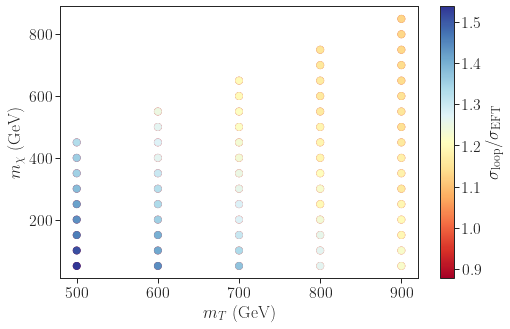

In [68]:
plt.figure(figsize=(8,5))
plt.scatter(allDataLoop['mST'],allDataLoop['mChi'],c=allDataLoop['ratio'],s=50,cmap=cm)
plt.colorbar(label=r'$\sigma_{\rm loop}/\sigma_{\rm EFT}$')
plt.xlabel(r'$m_{T}$ (GeV)')
plt.ylabel(r'$m_{\chi}$ (GeV)')
plt.show()